## Decision Trees
### Agenda
1. Introduction to Decision Trees
2. The Decision Tree Algorithms
3. Decision Tree for Classification

### 1. Introduction to Decision Trees
```
* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have less & right questions compared to not-so-good one
* The nodes are questions & leafs are prediction
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### import data

In [2]:
play_data = pd.read_csv('./DSVC/datasets/tennis.csv.txt')

### show data

In [3]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


* A decision tree for above data

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 2. Decision Tree Algorithm

* Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continues'.
* scikit-learn decision trees are based on CART

#### Criterion of creating Decision Tree
* Entropy - Objective of CART is to maximize information gain in each split
* Gini Impurity - If classes are mixed, gini impurity is maximul
##### Both the approaches, yields almost same results. We will discuss algorithm using Entropy


### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [4]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

### Calculation Entropy

根据上边公式，你需要完成下面代码块中Entropy_Play计算的代码

In [5]:
import math
play_count=play_data.play.count()
play_yes=list(play_data.play).count('yes')
play_no=list(play_data.play).count('no')
Entropy_Play =-play_yes/play_count*math.log(play_yes/play_count,2)-play_no/play_count*math.log(play_no/play_count,2)


In [6]:
Entropy_Play

0.94028595867063092

你的Entropy_Play正确结果应该为：0.940285

### Information Gain
* The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook
* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ]  – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ] 

In [7]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Calculation Information Gain

你需要完成下面代码块中Entropy_Play_Outlook_Sunny计算的代码

In [8]:
sunny_count=play_data[play_data.outlook == 'sunny'].outlook.count()
sunny_yes=list(play_data[play_data.outlook == 'sunny'].play).count('yes')
sunny_no=list(play_data[play_data.outlook == 'sunny'].play).count('no')
Entropy_Play_Outlook_Sunny = -sunny_yes/sunny_count*math.log(sunny_yes/sunny_count,2)-sunny_no/sunny_count*math.log(sunny_no/sunny_count,2)

In [9]:
Entropy_Play_Outlook_Sunny

0.97095059445466858

你的Entropy_Play_Outlook_Sunny正确结果应该为：0.970951

In [10]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [11]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0
overcast_count=play_data[play_data.outlook == 'overcast'].outlook.count()
Entropy_Play_Outlook_Overcast=0

In [12]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [13]:
# Entropy(Play|Outlook=rainy)
rainy_count=play_data[play_data.outlook == 'rainy'].outlook.count()
rainy_yes=list(play_data[play_data.outlook == 'rainy'].play).count('yes')
rainy_no=list(play_data[play_data.outlook == 'rainy'].play).count('no')
Entropy_Play_Outlook_Rain =  -rainy_yes/rainy_count*math.log(rainy_yes/rainy_count,2)-rainy_no/rainy_count*math.log(rainy_no/rainy_count,2)

In [14]:
Entropy_Play_Outlook_Rain

0.97095059445466858

你的Entropy_Play_Outlook_Rain正确结果应该为：0.970951

#### Gain on splitting by attribute outlook

根据以下公式计算Gain

In [15]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]
Gain_Play_Outlook=Entropy_Play -sunny_count/play_count*Entropy_Play_Outlook_Sunny-overcast_count/play_count*Entropy_Play_Outlook_Overcast-rainy_count/play_count*Entropy_Play_Outlook_Rain
Gain_Play_Outlook

0.24674981977443911

你的Gain(Play,Outlook)正确结果应该为:0.246750

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria

In [16]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [17]:
sunny=play_data[play_data.outlook == 'sunny']
sunny

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


你需要在下面计算Entropy_Play_Outlook_Sunny

In [18]:
# Entropy(Play_Sunny|)
#Entropy_Play_Outlook_Sunny = None

In [19]:
Entropy_Play_Outlook_Sunny

0.97095059445466858

你的Entropy_Play_Outlook_Sunny正确结果应该为:0.970951

### Information Gain for humidity

计算湿度信息增益

In [20]:
sunny[sunny. humidity=='high']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [21]:
#Entropy for attribute high = 0, also entropy for attribute normal = 0 
high_count=sunny[sunny. humidity=='high'].humidity.count()
high_yes=list(sunny[sunny. humidity=='high'].play).count('yes')
high_no=list(sunny[sunny. humidity=='high'].play).count('no')
if high_yes!=0 and high_no!=0:
     Entropy_Play_Humidity_High =-high_no/high_count*math.log(high_no/high_count,2)-high_yes/high_count*math.log(high_yes/high_count,2)
if high_yes==0:
    Entropy_Play_Humidity_High=0-high_no/high_count*math.log(high_no/high_count,2) 
if high_no==0 :
    Entropy_Play_Humidity_High=0-high_yes/high_count*math.log(high_yes/high_count,2)
if high_yes==0 and high_no==0:
    Entropy_Play_Humidity_High=0
    
print(Entropy_Play_Humidity_High)

0.0


In [22]:
sunny[sunny. humidity=='normal']

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [23]:
normal_count=sunny[sunny. humidity=='normal'].humidity.count()
normal_yes=list(sunny[sunny. humidity=='normal'].play).count('yes')
normal_no=list(sunny[sunny. humidity=='normal'].play).count('no')
if normal_yes!=0 and normal_no!=0:
    Entropy_Play_Humidity_Normal = -normal_yes/normal_count*math.log(normal_yes/normal_count,2)-normal_no/normal_count*math.log(normal_no/normal_count,2)
if normal_yes==0:
    Entropy_Play_Humidity_Normal=0-normal_no/normal_count*math.log(normal_no/normal_count,2)
if normal_no==0 :
    Entropy_Play_Humidity_Normal=0-normal_yes/normal_count*math.log(normal_yes/normal_count,2)
if normal_yes==0 and normal_no==0:
    Entropy_Play_Humidity_Normal=0
#Gain_Play_Humidity==Entropy_Play -high_count/play_count*Entropy_Play_Humidity_High-normal_count/play_count*Entropy_Play_Humidity_Normal

In [24]:
Gain=Entropy_Play_Outlook_Sunny -high_count/sunny_count*Entropy_Play_Humidity_High-normal_count/sunny_count*Entropy_Play_Humidity_Normal
Gain

0.97095059445466858

你的Information Gain for humidity正确结果应该为:0.970951

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]

计算Entropy_Wind_False

In [25]:
sunny[sunny.windy == False]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes


In [26]:
false_count=sunny[sunny.windy == False].windy.count()
false_yes=list(sunny[sunny.windy == False].play).count('yes')
false_no=list(sunny[sunny.windy == False].play).count('no')
print(false_yes,false_no)
if false_yes!=0 and false_no!=0:
    Entropy_Wind_False  = -false_yes/false_count*math.log(false_yes/false_count,2)-false_no/false_count*math.log(false_no/false_count,2)
if false_yes==0:
    Entropy_Wind_False  = 0-false_no/false_count*math.log(false_no/false_count,2)
if false_no==0 :
    Entropy_Wind_False  = 0-false_yes/false_count*math.log(false_yes/false_count,2)
if false_yes==0 and false_no==0:
    Entropy_Wind_False  = 0

1 2


In [27]:
Entropy_Wind_False

0.91829583405448956

你的Entropy_Wind_False正确结果应该为:0.918296

计算风信息增益

In [28]:
sunny[sunny.windy == True]

,outlook,temp,humidity,windy,play
1,sunny,hot,high,True,no
10,sunny,mild,normal,True,yes


In [29]:
true_count=sunny[sunny.windy == True].windy.count()
true_yes=list(sunny[sunny.windy == True].play).count('yes')
true_no=list(sunny[sunny.windy == True].play).count('no')
print(true_yes,true_no)
if true_yes!=0 and true_no!=0:
    Entropy_Wind_True  = -true_yes/true_count*math.log(true_yes/true_count,2)-true_no/true_count*math.log(true_no/true_count,2)
if true_yes==0:
    Entropy_Wind_True  = 0-true_no/true_count*math.log(true_no/true_count,2)
if true_no==0 :
    Entropy_Wind_True  =0 -true_yes/true_count*math.log(true_yes/true_count,2)
if true_yes==0 and true_no==0:
    Entropy_Wind_True  = 0
Entropy_Wind_True

1 1


1.0

In [30]:
Gain_Sunny_Windy=Entropy_Play_Outlook_Sunny -false_count/sunny_count*Entropy_Wind_False-true_count/sunny_count*Entropy_Wind_True 

In [31]:
Gain_Sunny_Windy

0.019973094021974891

你的Information Gain for windy正确结果应该为:0.019973

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]

计算热度信息增益

In [32]:
sunny[sunny.temp == 'hot']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no


In [33]:
hot_count=sunny[sunny.temp == 'hot'].temp.count()
hot_yes=list(sunny[sunny.temp == 'hot'].play).count('yes')
hot_no=list(sunny[sunny.temp == 'hot'].play).count('no')
if hot_yes!=0 and hot_no!=0:
    Entropy_Temp_Hot  = -hot_yes/hot_count*math.log(hot_yes/hot_count,2)-hot_no/hot_count*math.log(hot_no/hot_count,2)
if hot_yes==0:
    Entropy_Temp_Hot  = 0-hot_no/hot_count*math.log(hot_no/hot_count,2)
if true_no==0 :
    Entropy_Temp_Hot  =0 -hot_yes/hot_count*math.log(hot_yes/hot_count,2)
if hot_yes==0 and hot_no==0:
    Entropy_Temp_Hot  = 0
Entropy_Temp_Hot

0.0

In [34]:
sunny[sunny.temp == 'mild']

,outlook,temp,humidity,windy,play
7,sunny,mild,high,False,no
10,sunny,mild,normal,True,yes


In [35]:
mild_count=sunny[sunny.temp == 'mild'].temp.count()
mild_yes=list(sunny[sunny.temp == 'mild'].play).count('yes')
mild_no=list(sunny[sunny.temp == 'mild'].play).count('no')
if mild_yes!=0 and mild_no!=0:
    Entropy_Temp_Mild  = -mild_yes/mild_count*math.log(mild_yes/mild_count,2)-mild_no/mild_count*math.log(mild_no/mild_count,2)
if mild_yes==0:
    Entropy_Temp_Mild  = 0-mild_no/mild_count*math.log(mild_no/mild_count,2)
if mild_no==0 :
    Entropy_Temp_Mild  =0 -mild_yes/mild_count*math.log(mild_yes/mild_count,2)
if mild_yes==0 and mild_no==0:
    Entropy_Temp_Mild  = 0
Entropy_Temp_Mild

1.0

你的Information Gain for temp正确结果应该为:0.570951

In [36]:
sunny[sunny.temp == 'cool']

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes


In [37]:
cool_count=sunny[sunny.temp == 'cool'].temp.count()
cool_yes=list(sunny[sunny.temp == 'cool'].play).count('yes')
cool_no=list(sunny[sunny.temp == 'cool'].play).count('no')
if cool_yes!=0 and cool_no!=0:
    Entropy_Temp_Cool  = -cool_yes/cool_count*math.log(cool_yes/cool_count,2)-cool_no/cool_count*math.log(cool_no/cool_count,2)
if cool_yes==0:
    Entropy_Temp_Cool  = 0-cool_no/cool_count*math.log(cool_no/cool_count,2)
if cool_no==0 :
    Entropy_Temp_Cool  =0 -cool_yes/cool_count*math.log(cool_yes/cool_count,2)
if cool_yes==0 and cool_no==0:
    Entropy_Temp_Cool  = 0
Entropy_Temp_Cool

0.0

In [38]:
Gain_Sunny_Windy=Entropy_Play_Outlook_Sunny-hot_count/sunny_count*Entropy_Temp_Hot-mild_count/sunny_count*Entropy_Temp_Mild-cool_count/sunny_count*Entropy_Temp_Cool
Gain_Sunny_Windy

0.57095059445466856

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt3.PNG?raw=true" width="600px">

In [39]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [40]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Splitting the rainy branch

In [41]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [42]:
Entropy_Play_Outlook_Rainy=Entropy_Play_Outlook_Rain

In [43]:
Entropy_Play_Outlook_Rainy

0.97095059445466858

你的Entropy_Play_Outlook_Rainy正确结果应该为:0.970951

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

计算温度信息增益

In [44]:
rainy=play_data[play_data.outlook == 'rainy']
rainy

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


正确结果为0.020151

In [45]:
hot_count=rainy[rainy.temp == 'hot'].temp.count()
hot_yes=list(rainy[rainy.temp == 'hot'].play).count('yes')
hot_no=list(rainy[rainy.temp == 'hot'].play).count('no')
if hot_yes!=0 and hot_no!=0:
    Entropy_Rainy_Temp_Hot  = -hot_yes/hot_count*math.log(hot_yes/hot_count,2)-hot_no/hot_count*math.log(hot_no/hot_count,2)
if hot_yes==0:
    Entropy_Rainy_Temp_Hot  = 0-hot_no/hot_count*math.log(hot_no/hot_count,2)
if true_no==0 :
    Entropy_Rainy_Temp_Hot  =0 -hot_yes/hot_count*math.log(hot_yes/hot_count,2)
if hot_yes==0 and hot_no==0:
    Entropy_Rainy_Temp_Hot  = 0
Entropy_Rainy_Temp_Hot


E:\APP\Anacoda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


0

In [46]:
#mild
mild_count=rainy[rainy.temp == 'mild'].temp.count()
mild_yes=list(rainy[rainy.temp == 'mild'].play).count('yes')
mild_no=list(rainy[rainy.temp == 'mild'].play).count('no')
if mild_yes!=0 and mild_no!=0:
    Entropy_Rainy_Temp_Mild  = -mild_yes/mild_count*math.log(mild_yes/mild_count,2)-mild_no/mild_count*math.log(mild_no/mild_count,2)
if mild_yes==0:
    Entropy_Rainy_Temp_Mild  = 0-mild_no/mild_count*math.log(mild_no/mild_count,2)
if mild_no==0 :
    Entropy_Rainy_Temp_Mild  =0 -mild_yes/mild_count*math.log(mild_yes/mild_count,2)
if mild_yes==0 and mild_no==0:
    Entropy_Rainy_Temp_Mild  = 0
Entropy_Rainy_Temp_Mild

0.91829583405448956

In [47]:
#cool
cool_count=rainy[rainy.temp == 'cool'].temp.count()
cool_yes=list(rainy[rainy.temp == 'cool'].play).count('yes')
cool_no=list(rainy[rainy.temp == 'cool'].play).count('no')
if cool_yes!=0 and cool_no!=0:
    Entropy_Rainy_Temp_Cool  = -cool_yes/cool_count*math.log(cool_yes/cool_count,2)-cool_no/cool_count*math.log(cool_no/cool_count,2)
if cool_yes==0:
    Entropy_Rainy_Temp_Cool  = 0-cool_no/cool_count*math.log(cool_no/cool_count,2)
if cool_no==0 :
    Entropy_Rainy_Temp_Cool  =0 -cool_yes/cool_count*math.log(cool_yes/cool_count,2)
if cool_yes==0 and cool_no==0:
    Entropy_Rainy_Temp_Cool  = 0
Entropy_Rainy_Temp_Cool

1.0

In [48]:
Gain_Rainy_Temp=Entropy_Play_Outlook_Rainy-hot_count/rainy_count*Entropy_Rainy_Temp_Hot-mild_count/rainy_count*Entropy_Rainy_Temp_Mild-cool_count/rainy_count*Entropy_Rainy_Temp_Cool
Gain_Rainy_Temp

0.019973094021974891

### Information Gain for Windy

计算风信息增益

In [49]:
false_count=rainy[rainy.windy == False].windy.count()
false_yes=list(rainy[rainy.windy == False].play).count('yes')
false_no=list(rainy[rainy.windy == False].play).count('no')
print(false_yes,false_no)
if false_yes!=0 and false_no!=0:
    Entropy_Rainy_Wind_False  = -false_yes/false_count*math.log(false_yes/false_count,2)-false_no/false_count*math.log(false_no/false_count,2)
if false_yes==0:
    Entropy_Rainy_Wind_False  = 0-false_no/false_count*math.log(false_no/false_count,2)
if false_no==0 :
    Entropy_Rainy_Wind_False  = 0-false_yes/false_count*math.log(false_yes/false_count,2)
if false_yes==0 and false_no==0:
    Entropy_Rainy_Wind_False  = 0
Entropy_Rainy_Wind_False

3 0


0.0

In [50]:
true_count=rainy[rainy.windy == True].windy.count()
true_yes=list(rainy[rainy.windy == True].play).count('yes')
true_no=list(rainy[rainy.windy == True].play).count('no')
print(true_yes,true_no)
if true_yes!=0 and true_no!=0:
    Entropy_Rainy_Wind_True  = -true_yes/true_count*math.log(true_yes/true_count,2)-true_no/true_count*math.log(true_no/true_count,2)
if true_yes==0:
    Entropy_Rainy_Wind_True  = 0-true_no/true_count*math.log(true_no/true_count,2)
if true_no==0 :
    Entropy_Rainy_Wind_True  =0 -true_yes/true_count*math.log(true_yes/true_count,2)
if true_yes==0 and true_no==0:
    Entropy_Rainy_Wind_True  = 0
Entropy_Rainy_Wind_True

0 2


0.0

In [51]:
Gain_Rainy_Windy=Entropy_Play_Outlook_Rainy-false_count/rainy_count*Entropy_Rainy_Wind_False-true_count/rainy_count*Entropy_Rainy_Wind_True
Gain_Rainy_Windy

0.97095059445466858

正确结果为0.970951

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [52]:
normal_count=rainy[rainy. humidity=='normal'].humidity.count()
normal_yes=list(rainy[rainy. humidity=='normal'].play).count('yes')
normal_no=list(rainy[rainy. humidity=='normal'].play).count('no')
if normal_yes!=0 and normal_no!=0:
    Entropy_Play_Outlook_Rainy_Normal = -normal_yes/normal_count*math.log(normal_yes/normal_count,2)-normal_no/normal_count*math.log(normal_no/normal_count,2)
if normal_yes==0:
    Entropy_Play_Outlook_Rainy_Normal=0-normal_no/normal_count*math.log(normal_no/normal_count,2)
if normal_no==0 :
    Entropy_Play_Outlook_Rainy_Normal=0-normal_yes/normal_count*math.log(normal_yes/normal_count,2)
if normal_yes==0 and normal_no==0:
    Entropy_Play_Outlook_Rainy_Normal=0

In [53]:
Entropy_Play_Outlook_Rainy_Normal

0.91829583405448956

Entropy_Play_Outlook_Rainy_Normal的正确结果为0.918296

In [54]:
high_count=rainy[rainy. humidity=='high'].humidity.count()
high_yes=list(rainy[rainy. humidity=='high'].play).count('yes')
high_no=list(rainy[rainy. humidity=='high'].play).count('no')
if high_yes!=0 and high_no!=0:
     Entropy_Play_Outlook_Rainy_High =-high_no/high_count*math.log(high_no/high_count,2)-high_yes/high_count*math.log(high_yes/high_count,2)
if high_yes==0:
    Entropy_Play_Outlook_Rainy_High=0-high_no/high_count*math.log(high_no/high_count,2) 
if high_no==0 :
    Entropy_Play_Outlook_Rainy_High=0-high_yes/high_count*math.log(high_yes/high_count,2)
if high_yes==0 and high_no==0:
    Entropy_Play_Outlook_Rainy_High=0

In [55]:
Entropy_Play_Outlook_Rainy_High

1.0

计算湿度信息增益

In [56]:
Gain_Rainy_Humidity=Entropy_Play_Outlook_Rainy-normal_count/rainy_count*Entropy_Play_Outlook_Rainy_Normal-high_count/rainy_count*Entropy_Play_Outlook_Rainy_High
Gain_Rainy_Humidity

0.019973094021974891

正确结果为0.019973

### Final Tree

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 3. Decision Tree for Classification
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

In [57]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz

In [58]:
iris = load_iris()

In [59]:
iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [60]:
iris.target[:5]

array([0, 0, 0, 0, 0])

请在下方实现交叉熵DecisionTreeClassifier：

In [61]:
# DecisionTreeClassifier entropy
#loss=−∑yilog(yi^)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [64]:
trainX,testX,trainY,testY = train_test_split(iris.data, iris.target,test_size=0.33)
mylabels = ['sepal_length','sepal_width','petal_length','petal_width','class']
labels=['sepal_length ', 'sepal_width ', 'petal_length ', 'petal_width ']

请利用实现的DecisionTreeClassifier进行训练：

In [65]:
import pandas as pd
import numpy as np
import math
import operator
def Entropy(dataSet):
    num=len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentlabel=featVec[-1]            #最后一列的数值
        if currentlabel not in labelCounts.keys():
            labelCounts[currentlabel]=0
        labelCounts[currentlabel]+=1   #键值记录出现次数
    entropy=0.0
    for key in labelCounts:
        p=float(labelCounts[key])/num
        entropy-=p*math.log(p,2)
    return entropy



        
def split(dataSet,axis,value):             #按第n列值为n来划分
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reduceFeatVec=featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])#第几行数据
            retDataSet.append(reduceFeatVec)     #加入数据集
    return  retDataSet

#选择最好的数据集划分特征
def chooseBestFeature(dataSet,labels):
    numFeatures=len(dataSet[0])-1 
    entropyFull=Entropy(dataSet)#总的信息熵
    bestInfoGain=0.0;bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        uniqueVals=set(featList)                            #创建唯一的分类标签列表
        newEntropy=0.0
        for value in uniqueVals:
            subDataSet=split(dataSet,i,value)              #划分数据并计算香农熵
            p=len(subDataSet)/float(len(dataSet))
            newEntropy+=p*Entropy(subDataSet)
        infoGain=entropyFull-newEntropy
        print("{特征}",labels[i],"的信息增益为：",infoGain)
        if(infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    print("{最优特征}",bestFeature,':',labels[bestFeature])
    return bestFeature

def classify(inputTree,test,featLabels):
    firstStr=list(inputTree.keys())[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)
    classLabel=-1
    for key in secondDict.keys():
        if test[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':#是否为字典类型
                classLabel=classify(secondDict[key],test,featLabels)
            else:    classLabel=secondDict[key]#叶子结点
    return classLabel

def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():classCount[vote]=0
        classCount[vote]+=1
        sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    print('majorCnt',sortedClassCount[0][0]  )
    return sortedClassCount[0][0]     #选择出现次数最多的类别

def testingMajor(major, data_test):
    error = 0.0
    for i in range(len(data_test)):
        if major != data_test[i][-1]:
            error += 1
    return float(error) 

#后剪枝
def testing(myTree,data_test,labels):
    print(labels)
    error=0.0    
    for i in range(len(data_test)):
        if classify(myTree,data_test[i],labels)!=data_test[i][-1]:#如果预测结果与验证数据的类别标签不一致
            error+=1    #错误数+1
    print ('myTree %d' %error)
    return float(error)

def createTree(dataSet,labels,jianzhi):
    lab=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]               #类别相同停止划分
    if len(dataSet[0])==1:
        return majorityCnt(classList)       #遍历完所有特征时选择出现次数最多的类别
    bestFeat= chooseBestFeature(dataSet,labels)
    bestFeatlabel=labels[bestFeat]
    myTree={bestFeatlabel:{}}
    label_copy=labels
    #存储树
    del(labels[bestFeat])  
    print("labels:",labels)
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        sublabels=labels[:]
        subdataset=split(dataSet,bestFeat,value)
        myTree[bestFeatlabel][value]=createTree(subdataset,sublabels,jianzhi)
    if jianzhi=="post":
        if testing(myTree, dataSet,lab)> testingMajor(majorityCnt(classList),dataSet):
            print('剪枝')
            return majorityCnt(classList)
    return myTree

In [66]:
def fit(trainX,trainY):
    train= pd.DataFrame(np.hstack((trainX, trainY.reshape(-1, 1))),index = range(trainY.shape[0]),columns=mylabels)
    labels = ['sepal_length','sepal_width','petal_length','petal_width']
    train=(np.array(train)).tolist()
    labels = ['sepal_length','sepal_width','petal_length','petal_width']
    print('剪枝前')
    myTree=createTree(train,labels,None)
    print("剪枝前myTree:",myTree)
    #REP剪枝后
    labels = ['sepal_length','sepal_width','petal_length','petal_width']
    mode="post"
    print('剪枝后')
    myTree1=createTree(train,labels,mode)
    print("剪枝后myTree:",myTree)
    return myTree,myTree1
  

   

In [67]:
test= pd.DataFrame(np.hstack((testX, testY.reshape(-1, 1))),index = range(testY.shape[0]),columns=mylabels)
test=(np.array(test)).tolist()
data=test[0:-1]
labels = ['sepal_length','sepal_width','petal_length','petal_width']
myTree,myTree1=fit(trainX,trainY)

剪枝前
{特征} sepal_length 的信息增益为： 0.9290157452377874
{特征} sepal_width 的信息增益为： 0.6204523432152202
{特征} petal_length 的信息增益为： 1.4589096179082766
{特征} petal_width 的信息增益为： 1.4303620881855432
{最优特征} 2 : petal_length
labels: ['sepal_length', 'sepal_width', 'petal_width']
{特征} sepal_length 的信息增益为： 0.9182958340544896
{特征} sepal_width 的信息增益为： 0.9182958340544896
{特征} petal_width 的信息增益为： 0.9182958340544896
{最优特征} 0 : sepal_length
labels: ['sepal_width', 'petal_width']
{特征} sepal_length 的信息增益为： 0.6500224216483541
{特征} sepal_width 的信息增益为： 0.6500224216483541
{特征} petal_width 的信息增益为： 0.6500224216483541
{最优特征} 0 : sepal_length
labels: ['sepal_width', 'petal_width']
{特征} sepal_length 的信息增益为： 0.9182958340544896
{特征} sepal_width 的信息增益为： 0.9182958340544896
{特征} petal_width 的信息增益为： 0.9182958340544896
{最优特征} 0 : sepal_length
labels: ['sepal_width', 'petal_width']
{特征} sepal_length 的信息增益为： 0.9182958340544896
{特征} sepal_width 的信息增益为： 0.9182958340544896
{特征} petal_width 的信息增益为： 0.2516291673878229
{最优特征} 0 : sepal_l

在下方写代码来对测试集进行预测：

In [68]:
def predict(tree,testtvc):
    r=[]
    count=0
    for item  in testtvc:
        label=item[-1]
        label_predict=classify(tree,item,labels)
        r.append(label)
        if label==label_predict:
            count+=1
        accuracy=float(count/len(test))
    print('accuracy:',accuracy)
    return accuracy,r

In [69]:
print('剪枝前')
accuracy,predict_label=predict(myTree,test)
print('剪枝后')
accuracy,predict_label=predict(myTree1,test)


剪枝前
accuracy: 0.78
剪枝后
accuracy: 0.78


In [70]:
#image=export_graphviz(dt,out_file='dt.dot')
#graphviz.Source(image)

In [71]:
def softmax(data):
    z_exp=[math.exp(dt)for dt in data  ]
    sum_z_exp=sum(z_exp)
    result=[round(i/sum_z_exp,3)for i in z_exp]
    return result

In [72]:
def cross_Entropy(truth,predict):
    t = [[row[i] for row in truth] for i in range(len(truth[0]))]
    p=softmax(t[-1])#真实值的分布
    q=softmax(predict)#预测值的分布
    loss=0.0
    for i in range(len(p)):
        loss-=(p[i]*math.log(q[i])+(1-p[i])*math.log(1-q[i]))/len(p)
    return loss
 
    

In [73]:
#交叉熵
cross_Entropy(test,predict_label)

0.09265699161899456

In [74]:
#from sklearn.tree import export_graphviz
#labels = ['sepal_length','sepal_width','petal_length','petal_width']
#export_graphviz(myTree,out_file='myTree.dot', feature_names = labels, rounded = True, precision = 1)


### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt6.PNG?raw=true">

#### Feature Importances
* Important features will be higher up the tree
* We can use this techniques to identify important features

#### Visualizing Decision Decision Boundry

In [75]:
from sklearn.datasets import make_blobs

In [76]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)
'''
X=数据集
Y=标签
'''

'\nX=数据集\nY=标签\n'

"\nx，y：表示的是大小为(n,)的数组，也就是我们即将绘制散点图的数据点\ns:是一个实数或者是一个数组大小为(n,)，这个是一个可选的参数。\nc:表示的是颜色，也是一个可选项。默认是蓝色'b',表示的是标记的颜色，或者可以是一个表示颜色的字符，或者是一个长度为n的表示颜色的序列等等，\n感觉还没用到过现在不解释了。但是c不可以是一个单独的RGB数字，也不可以是一个RGBA的序列。可以是他们的2维数组（只有一行）。\ncmap:Colormap实体或者是一个colormap的名字，cmap仅仅当c是一个浮点数数组的时候才使用。如果没有申明就是image.cmap\n\n"

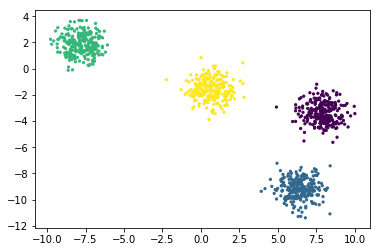

In [77]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')
'''
x，y：表示的是大小为(n,)的数组，也就是我们即将绘制散点图的数据点
s:是一个实数或者是一个数组大小为(n,)，这个是一个可选的参数。
c:表示的是颜色，也是一个可选项。默认是蓝色'b',表示的是标记的颜色，或者可以是一个表示颜色的字符，或者是一个长度为n的表示颜色的序列等等，
感觉还没用到过现在不解释了。但是c不可以是一个单独的RGB数字，也不可以是一个RGBA的序列。可以是他们的2维数组（只有一行）。
cmap:Colormap实体或者是一个colormap的名字，cmap仅仅当c是一个浮点数数组的时候才使用。如果没有申明就是image.cmap

'''

利用基尼系数的决策树实现：

In [98]:
# DecisionTreeClassifier gini
import operator 
import math
from math import pow 
from collections import Counter
from math import log



def gini(dataSet): 
    total_sample=len(dataSet) 
    if total_sample==0: 
        return 0 
    label_counts=label_unique_cnt(dataSet) 
    gini=0 
    for label in label_counts: 
        gini=gini+pow(label_counts[label],2) 
    gini=1-float(gini)/pow(total_sample,2) 
    return gini

def label_unique_cnt(dataSet): 
    label_unique_cnt={} 
    for x in dataSet: 
        label=x[len(x)-1] 
        if label not in label_unique_cnt: 
            label_unique_cnt[label]=0 
        label_unique_cnt[label]+=1 
    return label_unique_cnt



def getBestFeature(dataSet): 
    label_num=len(dataSet[0])-1 
    bestGini=0 
    currentgini=gini(dataSet) 
    for index in range(0,label_num): 
        newgini=0 
        sample_label_num=[example[index] for example in dataSet]   #example[index]取每一列的数值
        valueset=set(sample_label_num) 
        for value in valueset: 
            subdata=split_tree(dataSet,index,value) 
            newgini=newgini+len(subdata)*gini(subdata)/len(dataSet) 
        gaingini=currentgini-newgini 
        if gaingini>bestGini: 
            bestGini=gaingini 
            bestFeatureIndex=index 
    return bestFeatureIndex

def majorcnt(classlist): 
    classValue=set(classlist) #无序不重复元素集 0,1,2,3
    bestValueNum=0 
    bestClassValue=None 
    for value in classValue: 
        valueNum=classlist.count(value) 
        if valueNum>=bestValueNum: 
            bestValueNum=valueNum 
            bestClassValue=value 
    #print(bestClassValue) 
    return bestClassValue

def split_tree(dataSet,axis,value): #dataSet数据,axis最佳特征,value特征属性值num标签属性值
    subdata=[]  
    for sample in dataSet: 
        if sample[axis]==value: 
            subdata1=sample[:axis] 
            subdata1.extend(sample[axis+1:]) 
            subdata.append(subdata1) 
        return subdata
    
def split(dataSet,i): #dataSet数据,,i标签属性值
    subdata=[] 
    for sample in dataSet:
        if sample[-1]==i:
            subdata.append(sample)
    return subdata

def split_tree1(dataSet,axis,con,sub,bestFeatureLabel): #dataSet数据,axis最佳特征,con数据集的最佳特征的最大最小值,sub对应的标签划分的数据集
    subdata=[] 
    aa=[]
    if bestFeatureLabel=="Y":
        List=[example[1] for example in sub]
        b=[x[1] for x in dataSet]
    else:
        List=[example[0] for example in sub]
        b=[x[0] for x in dataSet]
   # print(List[con[0]],List[con[1]])
    #print("b",len(b))
    for i in range(len(b)):
        #print(b[i])
        if float(b[i])>= List[con[0]] and float(b[i])<=List[con[1]]: 
            subdata.append(dataSet[i])
    aa.append(List[con[0]])
    aa.append(List[con[1]])

    return subdata,aa

def find(sub,bestFeatureLabel):
    limit=[]
   # print(bestFeatureLabel)
    if bestFeatureLabel=="Y":
        List=[example[1] for example in sub]
        #print(List)
        limit.append(List.index(min(List)))
        limit.append(List.index(max(List)))
        #print("&&&&&&&&&")
        #print(limit[0],limit[1])
    else:
        List=[example[0] for example in sub]
        #print(List)
        limit.append(List.index(min(List)))
        limit.append(List.index(max(List)))
        #print("%%%%%%%%%%")
        #print(limit[0],limit[1])
    return limit
    
global rangee
rangee=[]
global myTree
myTree={}
def createTree1(dataSet,labels):
    classList=[example[-1] for example in dataSet]    #取分类标签
    #print(classList.count(classList[0]),len(classList))
    if classList.count(classList[0])==len(classList):    #如果类别完全相同则停止继续划分
        return classList[0]
        #return dataSet
    if len(dataSet[0])==1:        #遍历完所有特征时返回出现次数最多的类标签
        return majorcnt(classList)
    bestFeature=getBestFeature(dataSet)    #选择最优特征
    #print(labels)
    bestFeatureLabel=labels[bestFeature]    #最优特征的标签
    myTree={bestFeatureLabel:{}}    #根据最优特征的标签生成树
    del(labels[bestFeature])         #删除已经使用特征标签
    #bestFeatureValue=[sample[bestFeature]for sample in dataSet]    #得到训练集中所有最优特征的属性值
    #bestFeatureValueSet=set(bestFeatureValue)         #去掉重复的属性值
   
    #for value in bestFeatureValue:           #遍历特征，创建决策树
    num=set(classList)
    for i in range(len(num)):
        sub=split(dataSet,i) 
        if sub!=[]:
            con=find(sub,bestFeatureLabel)
            data,b=split_tree1(dataSet,bestFeature,con,sub,bestFeatureLabel)
            #print(b)
            rangee.append(b)
            subLabels=labels[:]
            myTree[bestFeatureLabel][i]=createTree1(data,subLabels)
    return myTree,rangee
    #return myTree

进行训练

In [99]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(X, Y)


def createDataSet():
        label=['X','Y','R']        #特征标签
        train=pd.DataFrame(np.hstack((trainX,trainY.reshape(-1,1))),index=range(trainY.shape[0]),columns=label)
        train=(np.array(train)).tolist()
        dataSet = train
        labels=['X','Y']
        return dataSet, labels 
   
    
def fit(trainX,trainY):
    dataSet, labels = createDataSet()
    myTree,rangee = createTree1(dataSet, labels)
    return  myTree,rangee

myTree,rangee=fit(X,Y)

#print(myTree)
print(rangee)
'''
def fit(trainX,trainY):
    dataSet, labels = createDataSet()
    myTree= createTree1(dataSet, labels)
    return  myTree

myTree=fit(X,Y)

print(myTree)
'''

[[4.905014502404979, 10.003439244825916], [-5.628064933836418, -1.6936435745245628], [-11.397907772151008, -7.541507019787613], [3.9215529222165113, 8.22139620890287], [-4.719539564139607, -1.7357956146789657], [-11.397907772151008, -7.541507019787613], [-9.768545002160257, -6.069803123703422], [-1.2878311772231061, 2.8061311503067463]]


'\ndef fit(trainX,trainY):\n    dataSet, labels = createDataSet()\n    myTree= createTree1(dataSet, labels)\n    return  myTree\n\nmyTree=fit(X,Y)\n\nprint(myTree)\n'

In [100]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

### Calculation Outcome

你需要完成下面代码块中预测值的计算：

In [103]:
def makeClassDecision(tree,labels,sample,rangee): 
    firstStr = next(iter(tree))                                                        #获取决策树结点
    classLabel=[]
   # secondDict = tree[firstStr]                                                        #下一个字典
    featIndex = labels.index(firstStr)
    #print(sample[featIndex+1])
    if(sample[featIndex]<=rangee[0][1]) and (sample[featIndex]>=rangee[0][0]):
        if(sample[featIndex+1]<=rangee[1][1]) and (sample[featIndex+1]>=rangee[1][0]):
            classLabel=0
            #print(sample,classLabel)
            return classLabel 
        elif(sample[featIndex+1]<=rangee[2][1]) and (sample[featIndex+1]>=rangee[2][0]): 
                classLabel=1
               # print(sample,classLabel)
                return classLabel 
    if(sample[featIndex]<=rangee[3][1]) and (sample[featIndex]>=rangee[3][0]):
        if(sample[featIndex+1]<=rangee[4][1]) and (sample[featIndex+1]>=rangee[4][0]):
                classLabel=0
                #print(sample,classLabel)
                return classLabel 
        elif(sample[featIndex+1]<=rangee[5][1]) and (sample[featIndex+1]>=rangee[5][0]): 
                classLabel=1
                #print(sample,classLabel)
                return classLabel 
    elif(sample[featIndex]<=rangee[6][1]) and (sample[featIndex]>=rangee[6][0]): 
            classLabel=2
           #print(sample,classLabel)
            return classLabel
    elif(sample[featIndex]>=rangee[7][0]) and (sample[featIndex]<=rangee[7][1]): 
            classLabel=3
            #print(sample,classLabel)
            return classLabel 

        
def predict(testX,testY):
    dataSet, labels = createDataSet()
    #print(labels)
    myTree,rangee = createTree1(dataSet, labels)
    sample= testX
    t=[]
    for a in range(len(testX)):
        labels= ['X','Y']
        sample=testX[a]
        #print(sample)
        x=makeClassDecision(myTree,labels,sample,rangee)
        t.append(x)
    
    return  t

outcome=predict(testX,testY)
print(outcome)

[3, None, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 3, 2, 2, 1, 3, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 0, 3, 3, 0, 0, 1, 1, 0, 3, 3, 1, 0, 1, 1, 2, 2, 2, 3, 3, 1, 1, 0, 1, 1, None, 2, 0, 1, 3, 0, 2, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 3, 0, 0, 3, 3, 1, 2, 2, 2, 3, 2, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 0, 2, 3, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, None, 3, 1, 0, 3, 2, 0, 0, 1, 3, 3, 0, 1, 0, 3, 1, 1, 3, 1, 0, 3, 1, 0, 1, 2, 1, 2, 3, 3, 1, 1, 2, 3, 1, None, 3, 2, 1, 2, 3, 3, 3, 0, 0, 2, 3, 1, 2, 3, 0, 3, 2, 1, 2, 1, 3, 2, 0, 0, 3, 3, 0, 0, 1, 1, 0, 3, 1, 3, 3, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 3, 2, 0, 0, 3, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 2, 2, 3, 0, 0, 0, 0, 1, None, 0, 3, 3, 1, 0, 2, 3, 0, 3, 0, 3, 3, 0, 0, 1, 3, 0, 2, 1, 1, 2, 2]


In [104]:
xx.shape

(86, 109)

ValueError: Invalid RGBA argument: 3

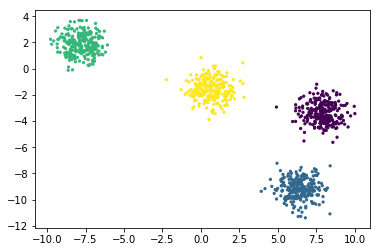

In [105]:
outcome=predict(testX,testY)
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
#plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=5,cmap='viridis')
plt.show()

In [107]:
outcome=predict(testX,testY)
print(len(testY),len(outcome))
print(outcome)
count=0
for i in range(len(testY)):
    if outcome[i]==testY[i]:
        count=count+1
correct=count/len(testY)
print(correct)

250 250
[3, None, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 3, 2, 2, 1, 3, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 0, 3, 3, 0, 0, 1, 1, 0, 3, 3, 1, 0, 1, 1, 2, 2, 2, 3, 3, 1, 1, 0, 1, 1, None, 2, 0, 1, 3, 0, 2, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 3, 0, 0, 3, 3, 1, 2, 2, 2, 3, 2, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 0, 2, 3, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, None, 3, 1, 0, 3, 2, 0, 0, 1, 3, 3, 0, 1, 0, 3, 1, 1, 3, 1, 0, 3, 1, 0, 1, 2, 1, 2, 3, 3, 1, 1, 2, 3, 1, None, 3, 2, 1, 2, 3, 3, 3, 0, 0, 2, 3, 1, 2, 3, 0, 3, 2, 1, 2, 1, 3, 2, 0, 0, 3, 3, 0, 0, 1, 1, 0, 3, 1, 3, 3, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 3, 2, 0, 0, 3, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 2, 2, 3, 0, 0, 0, 0, 1, None, 0, 3, 3, 1, 0, 2, 3, 0, 3, 0, 3, 3, 0, 0, 1, 3, 0, 2, 1, 1, 2, 2]
0.98


![](img/questions-01.png)